In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from six import StringIO
import pydotplus
from IPython.display import Image

In [2]:
column_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv('pima-indians-diabetes.csv', names=column_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#splitting data and target
X = data.iloc[:, :-1].values
y = np.reshape(data.iloc[:, -1].values, (-1, 1))

In [4]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

In [5]:
#applying decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
y_pred=dtc.predict(X_test)

In [7]:
print(f'Accuracy:- {accuracy_score(y_test,y_pred)}')

Accuracy:- 0.70703125


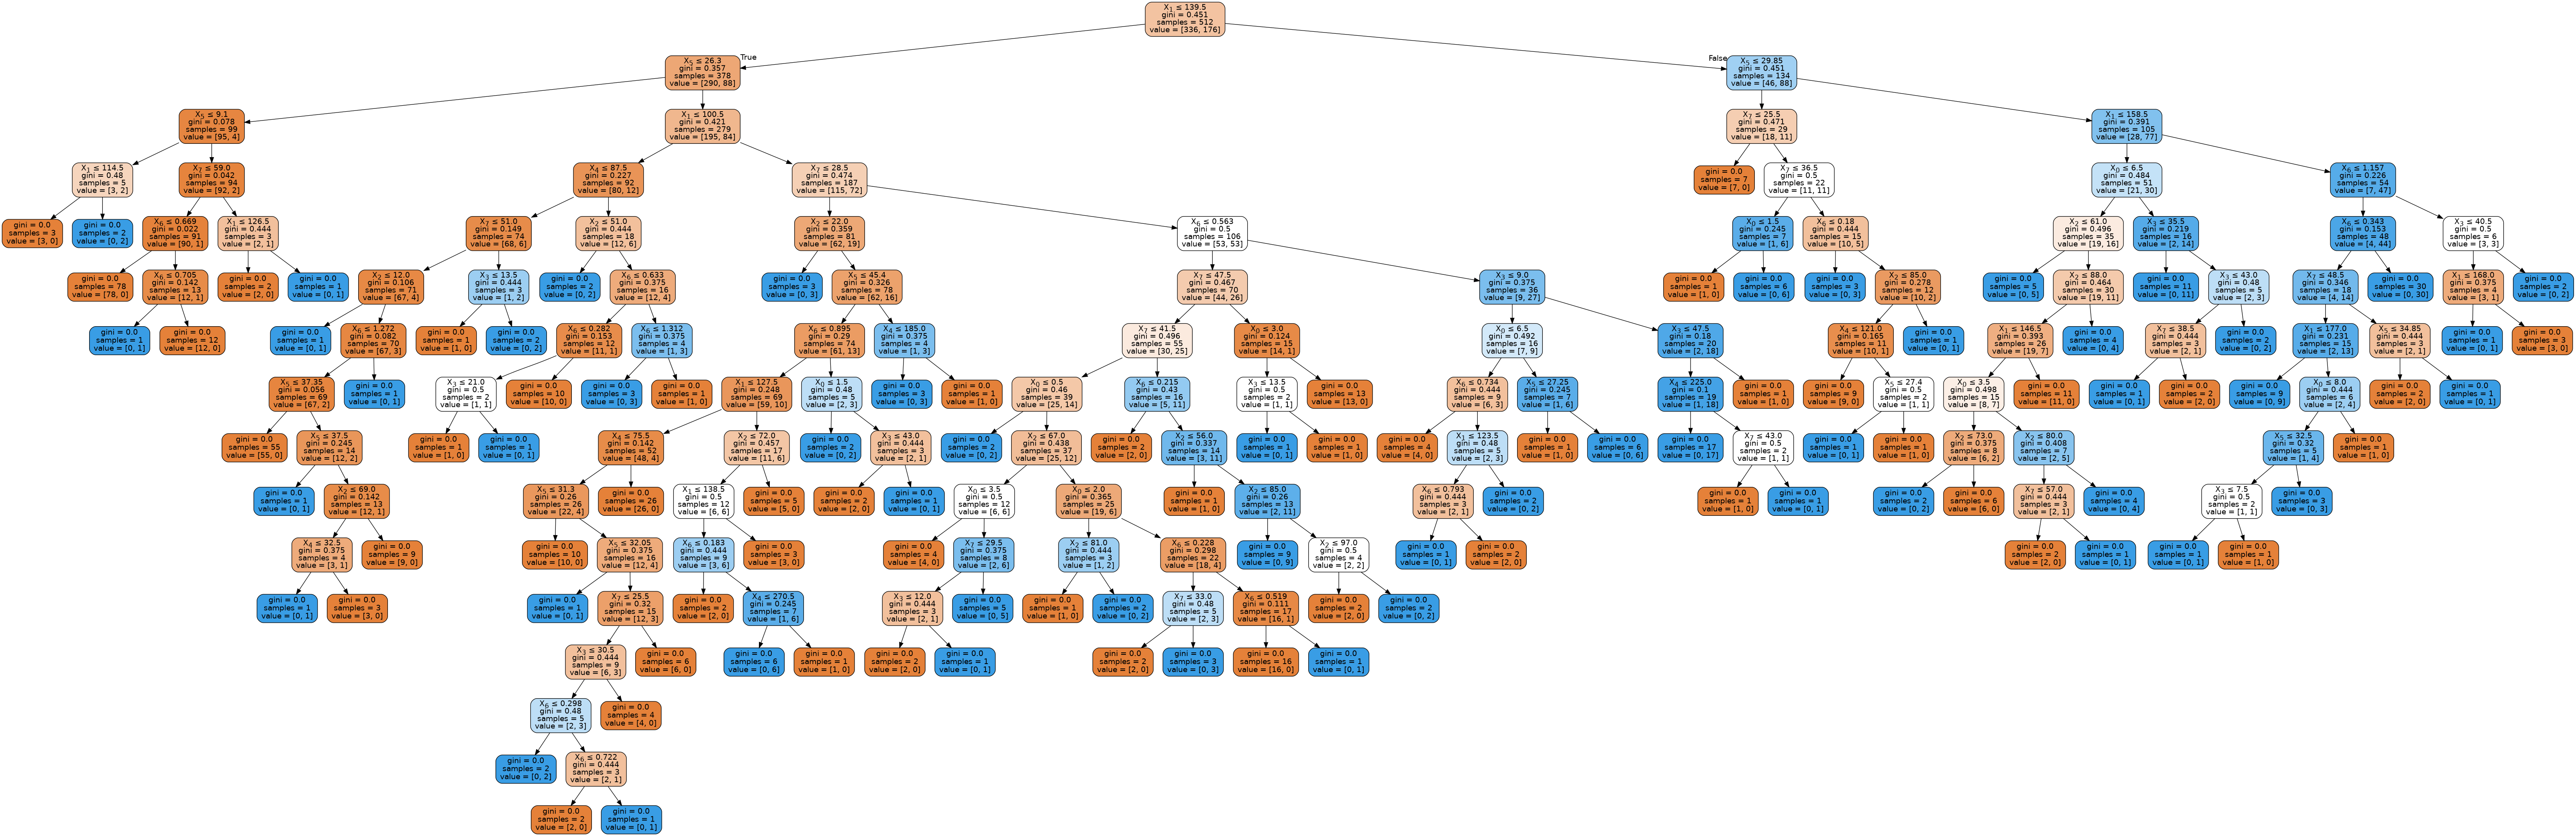

In [8]:
dotfile = StringIO()
export_graphviz(
    dtc,
    out_file=dotfile,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())